In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
X = df.drop(columns=['species'])
y = df['species'] # loại hoa

In [27]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# khởi tạo model
# có thể thay thế bằng criterion = 'entropy' tùy bài toán
model = DecisionTreeClassifier()

In [31]:
#Gini tốt hơn cho các feature continuous, Entropy phù hợp chỉ có feature category
#Gini giảm trường hợp phân lớp nhầm
#Entropy thường sử dụng phân tích khám phá
#Entropy xử lý chậm hơn

In [32]:
model.fit(X, y)

DecisionTreeClassifier()

In [33]:
model.score(X, y)

1.0

In [34]:
# dự đoán trên dữ liệu mới
X_new = [[4.8, 3.1, 1.4, 0.25],
         [6.5, 3.0, 4.4, 1.5],
         [5.9, 3.0, 5.1, 1.9]]

In [35]:
y_new = model.predict(X_new)
y_new

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
# trực quan hóa cây quyết định
from IPython.display import Image 
import pydotplus
from sklearn import tree
from sklearn import datasets
#pip install pydotplus

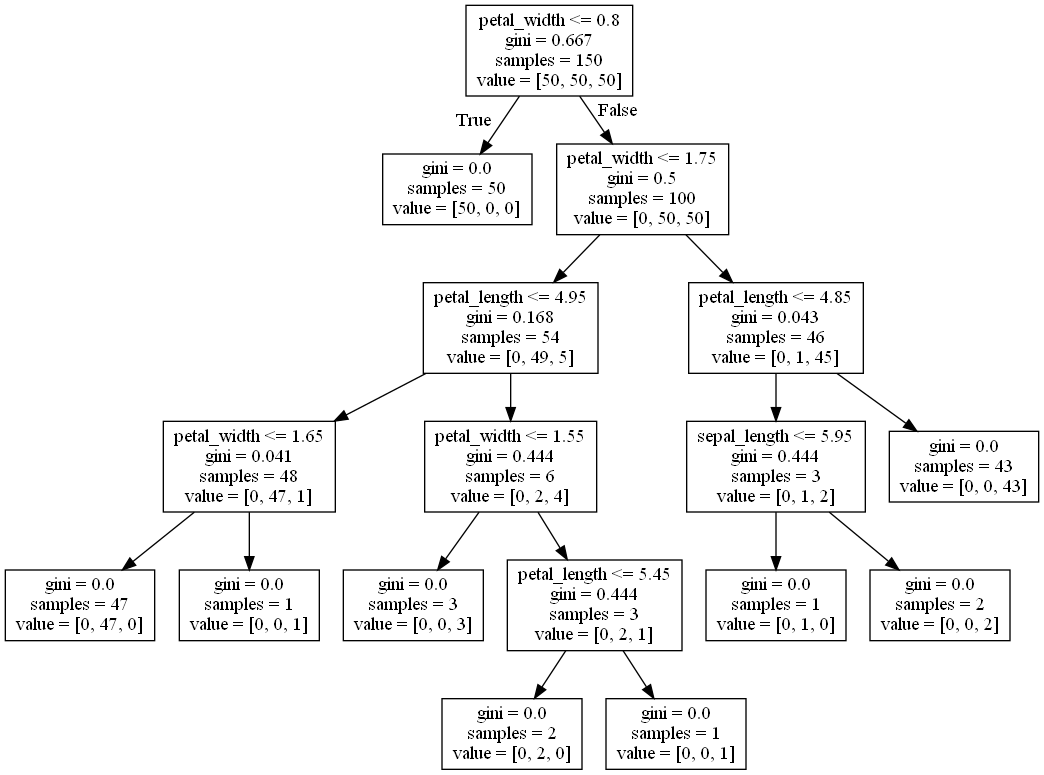

In [37]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [38]:
# Save pdf
graph.write_pdf('iris_0801.pdf')
#save image
graph.write_png('iris_0801.png')

True

In [39]:
with open('iris_0801.txt', 'w') as f:
    f = tree.export_graphviz(model, out_file=f, feature_names=X.columns, class_names=df['species'])
    print('đã xuất ra file')

đã xuất ra file


In [40]:
import PIL.Image as Image

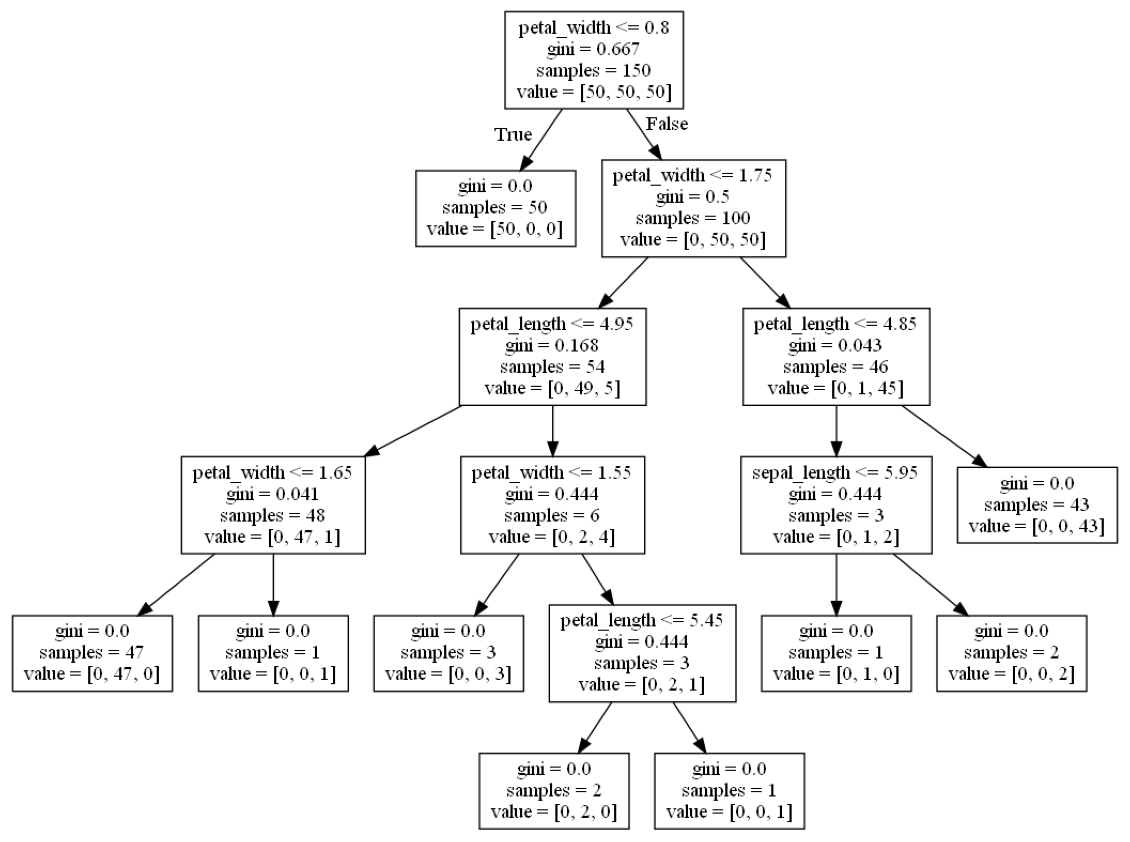

In [41]:
photo = Image.open('iris_0801.png')
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(photo)